# RNN for Time Series Prediction of Electricity Consumption

In [1]:
# !pip install --upgrade tensorflow
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

In [2]:
# Load the data
import os

with open('household_power_consumption.txt') as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(';')
lines = lines[1:]
print(header)
print(len(lines))

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
2075259


In [3]:
import numpy as np
active_power = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header)-2))
for i, line in enumerate(lines):
    values = [(float(x) if x != '?' and x != '' else 0) for x in line.split(';')[2:]] #skip the date and time, can't imput missing values so zero'd them -- which I don't like so...
    if len(values) > 0:
        active_power[i] = values[0]
        raw_data[i, :] = values[:]
        
print(raw_data[:10])

[[  4.216   0.418 234.84   18.4     0.      1.     17.   ]
 [  5.36    0.436 233.63   23.      0.      1.     16.   ]
 [  5.374   0.498 233.29   23.      0.      2.     17.   ]
 [  5.388   0.502 233.74   23.      0.      1.     17.   ]
 [  3.666   0.528 235.68   15.8     0.      1.     17.   ]
 [  3.52    0.522 235.02   15.      0.      2.     17.   ]
 [  3.702   0.52  235.09   15.8     0.      1.     17.   ]
 [  3.7     0.52  235.22   15.8     0.      1.     17.   ]
 [  3.668   0.51  233.99   15.8     0.      1.     17.   ]
 [  3.662   0.51  233.86   15.8     0.      2.     16.   ]]


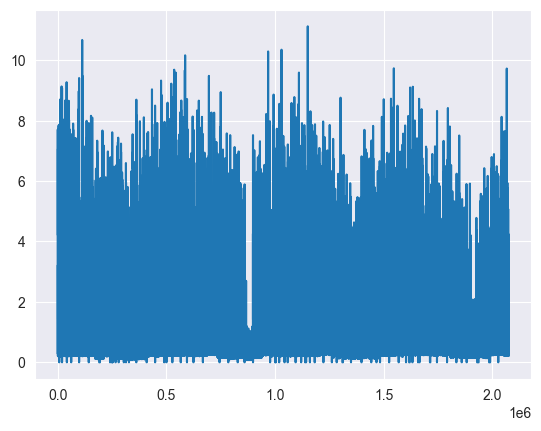

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(active_power)), active_power)

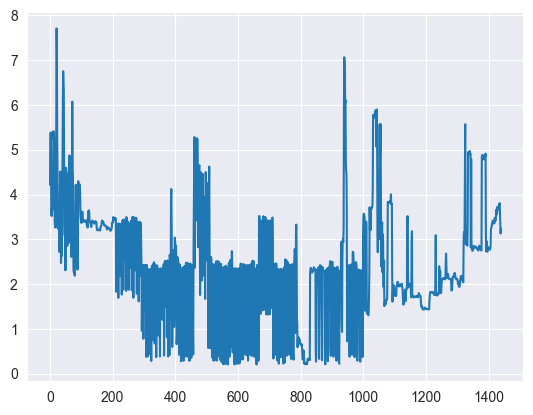

In [5]:
plt.plot(range(1440), active_power[:1440]) #first day only

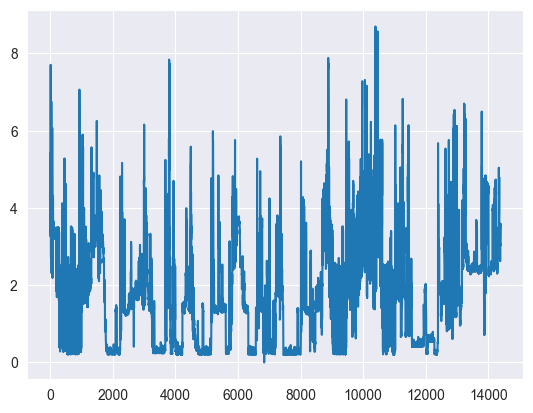

In [6]:
plt.plot(range(14400), active_power[:1440*10]) #first 10 days

In [7]:
#let's use the pandas library instead because I want to impute missing values
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates={'datetime':[0,1]}, index_col=['datetime'], dayfirst = True)
# Convert all columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

display(df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


<Axes: xlabel='datetime'>

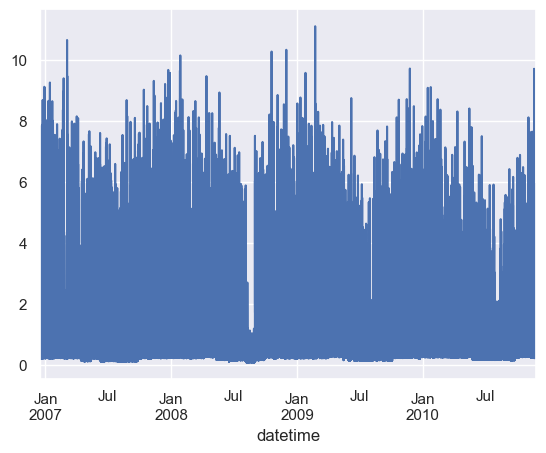

In [8]:
import seaborn as sns #for prettier plots
sns.set()

df['Global_active_power'].plot()

<Axes: xlabel='datetime'>

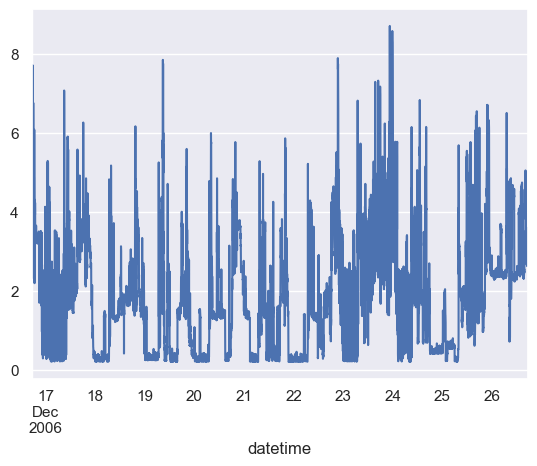

In [9]:
#plot first 10 days only
df['Global_active_power'][:1440*10].plot()

In [10]:
#create a dataframe showing all rows with missing values
df1 = df[df.isna().any(axis=1)]
display(df1) #there are 11 rows with missing values

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#impute missing values using linear interpolation
df.interpolate(method='linear', inplace=True)
#recreate dataframe showing all rows with missing values, which should be empty now
df1 = df[df.isna().any(axis=1)]
display(df1) #empty :)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,


<Axes: xlabel='datetime'>

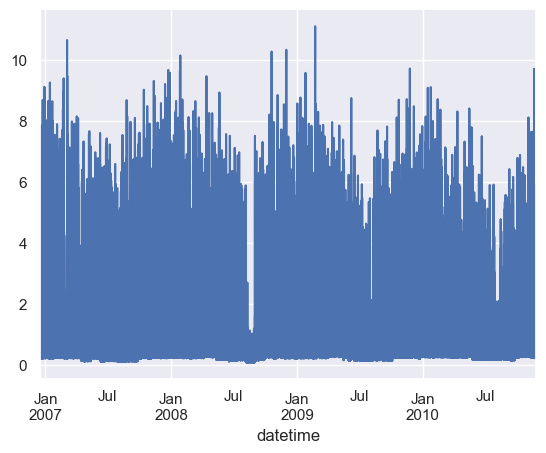

In [12]:
#new plot with interpolated and imputed values
df['Global_active_power'].plot() #doesn't make an obvious visible difference, but it makes me happier

In [13]:
clean_data = df.to_numpy() #convert to numpy array
print(clean_data[:10])
active_power = clean_data[:,0] #active_power = [x[0] for x in clean_data] #same thing, but uses numpy slicing
print(active_power[:10])

[[  4.216   0.418 234.84   18.4     0.      1.     17.   ]
 [  5.36    0.436 233.63   23.      0.      1.     16.   ]
 [  5.374   0.498 233.29   23.      0.      2.     17.   ]
 [  5.388   0.502 233.74   23.      0.      1.     17.   ]
 [  3.666   0.528 235.68   15.8     0.      1.     17.   ]
 [  3.52    0.522 235.02   15.      0.      2.     17.   ]
 [  3.702   0.52  235.09   15.8     0.      1.     17.   ]
 [  3.7     0.52  235.22   15.8     0.      1.     17.   ]
 [  3.668   0.51  233.99   15.8     0.      1.     17.   ]
 [  3.662   0.51  233.86   15.8     0.      2.     16.   ]]
[4.216 5.36  5.374 5.388 3.666 3.52  3.702 3.7   3.668 3.662]


In [14]:
#Computing the number of training, validation, and test samples: first 50% for training, 25% for validation, 25% for testing
num_train_samples = int(0.5 * len(clean_data))
num_val_samples = int(0.25 * len(clean_data))
num_test_samples = len(clean_data) - num_train_samples - num_val_samples

print("Number of samples for training:", num_train_samples)
print("Number of samples for validation:", num_val_samples)
print("Number of samples for testing:", num_test_samples)

Number of samples for training: 1037629
Number of samples for validation: 518814
Number of samples for testing: 518816


In [15]:
#Normalizing the data
mean = clean_data[:num_train_samples].mean(axis=0)
clean_data -= mean
std = clean_data[:num_train_samples].std(axis=0)
clean_data /= std

from tensorflow import keras
from tensorflow.keras import layers

sampling_rate = 60 #one data point every hour
sequence_length = 120 #120 hours aka 5 days
delay = sampling_rate * (sequence_length + 24 - 1) #predict 24 hours ahead
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    shuffle = True,
    sequence_length = sequence_length, 
    batch_size=batch_size,
    start_index= 0,
    end_index = num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size=batch_size,
    start_index= num_train_samples,
    end_index = num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size=batch_size,
    start_index= num_train_samples + num_val_samples
)

In [16]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 7)
targets shape: (256,)


In [17]:
#Computing the baseline MAE
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 0.72
Test MAE: 0.68


# Basic Dense Model

Epoch 1/10
4012/4026 [============================>.] - ETA: 0s - loss: 0.6380 - mae: 0.5582INFO:tensorflow:Assets written to: pikapower_dense.tf\assets


INFO:tensorflow:Assets written to: pikapower_dense.tf\assets


4026/4026 [==============================] - 32s 8ms/step - loss: 0.6379 - mae: 0.5581 - val_loss: 0.6690 - val_mae: 0.5878
Epoch 2/10
4026/4026 [==============================] - 31s 8ms/step - loss: 0.5610 - mae: 0.5257 - val_loss: 0.7149 - val_mae: 0.6193
Epoch 3/10
4026/4026 [==============================] - 33s 8ms/step - loss: 0.5417 - mae: 0.5182 - val_loss: 0.7207 - val_mae: 0.6180
Epoch 4/10
4026/4026 [==============================] - 31s 8ms/step - loss: 0.5322 - mae: 0.5141 - val_loss: 0.7138 - val_mae: 0.6133
Epoch 5/10
4026/4026 [==============================] - 31s 8ms/step - loss: 0.5260 - mae: 0.5114 - val_loss: 0.7280 - val_mae: 0.6193
Epoch 6/10
4026/4026 [==============================] - 29s 7ms/step - loss: 0.5212 - mae: 0.5093 - val_loss: 0.7241 - val_mae: 0.6196
Epoch 7/10
4026/4026 [==============================] - 31s 8ms/step - loss: 0.5174 - mae: 0.5079 - val_loss: 0.7255 - val_mae: 0.6191
Epoch 8/10
4026/4026 [==============================] - 37s 9ms/st

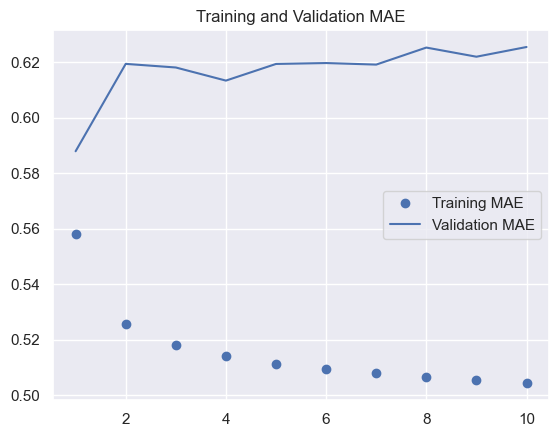

In [18]:
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_dense.tf", save_best_only=True)
]

model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_dense.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

#and plot it
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [19]:
#Training and evaluating a simple LSTM-based RNN model
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.LSTM(16)(inputs) #16 hidden units
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_lstm.tf", save_best_only=True) # .tf instead of .keras because of weird versioning issues
    #keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) #copilot wanted this, research why
]
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae') #copilot wanted this, research why
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_lstm.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
4026/4026 [==============================] - ETA: 0s - loss: 0.7371 - mae: 0.6039INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


4026/4026 [==============================] - 182s 45ms/step - loss: 0.7371 - mae: 0.6039 - val_loss: 0.6302 - val_mae: 0.5864
Epoch 2/10
4026/4026 [==============================] - 163s 41ms/step - loss: 0.6840 - mae: 0.5716 - val_loss: 0.6400 - val_mae: 0.5812
Epoch 3/10
4026/4026 [==============================] - 160s 40ms/step - loss: 0.6634 - mae: 0.5608 - val_loss: 0.6449 - val_mae: 0.5752
Epoch 4/10
4026/4026 [==============================] - 190s 47ms/step - loss: 0.6516 - mae: 0.5546 - val_loss: 0.6727 - val_mae: 0.5914
Epoch 5/10
4026/4026 [==============================] - 172s 43ms/step - loss: 0.6422 - mae: 0.5496 - val_loss: 0.6966 - val_mae: 0.6066
Epoch 6/10
4026/4026 [==============================] - 158s 39ms/step - loss: 0.6359 - mae: 0.5460 - val_loss: 0.7102 - val_mae: 0.6102
Epoch 7/10
4026/4026 [==============================] - 169s 42ms/step - loss: 0.6309 - mae: 0.5435 - val_loss: 0.7070 - val_mae: 0.6076
Epoch 8/10
4026/4026 [==============================

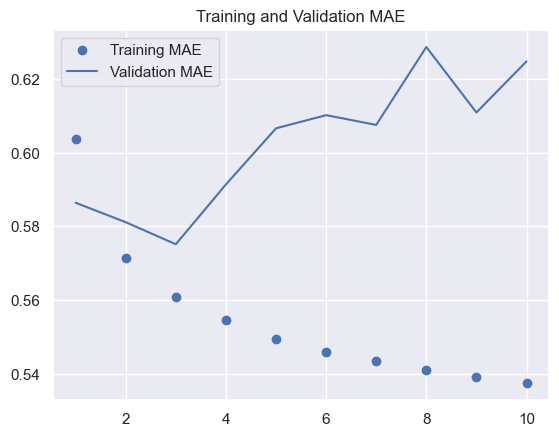

In [20]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Training and evaluating a dropout-regularized LSTM-based RNN model

In [21]:
# ###commented out because it would take 4+ hours to train on my current machine
# 
# inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1])) 
# x= layers.LSTM(32, recurrent_dropout=0.25)(inputs)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1)(x)
# model = keras.Model(inputs, outputs)
# 
# callbacks = [
#     keras.callbacks.ModelCheckpoint("pikapower_lstm_dropout.tf", save_best_only=True)
# ]
# model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
# history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)
# 
# model = keras.models.load_model("pikapower_lstm_dropout.tf")
# print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

In [22]:
# ###commented out because it obviously doesn't work without the above block
# 
# loss = history.history['mae']
# val_loss = history.history['val_mae']
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training MAE')
# plt.plot(epochs, val_loss, 'b', label='Validation MAE')
# plt.title('Training and Validation MAE')
# plt.legend()
# plt.show()

# Training and evaluating a stacked LSTM-based RNN model

In [23]:
# ###commented out because it would take 11+ hours to train on my current machine
# 
# inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
# x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
# x = layers.GRU(32, recurrent_dropout=0.5)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1)(x)
# model = keras.Model(inputs, outputs)
# 
# callbacks = [
#     keras.callbacks.ModelCheckpoint("pikapower_gru_stacked.tf", save_best_only=True)
# ]
# 
# model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
# history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)
# model = keras.models.load_model("pikapower_gru_stacked.tf")
# print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

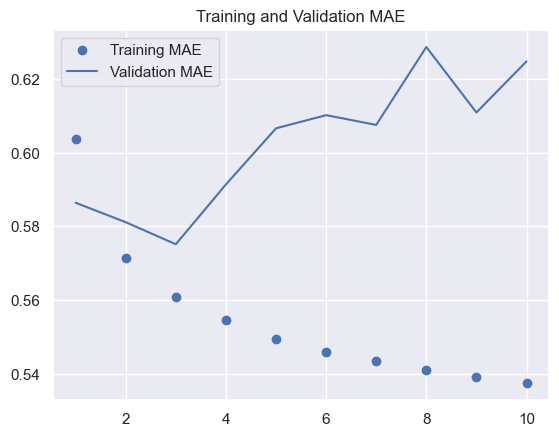

In [24]:
#

loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Bidirectional RNN
Training and evaluating a bidirectional LSTM-based RNN model (best used for NLP/text, not this), but transformers are better anyways sooooo

Epoch 1/10
4026/4026 [==============================] - ETA: 0s - loss: 0.7181 - mae: 0.5951INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


4026/4026 [==============================] - 211s 52ms/step - loss: 0.7181 - mae: 0.5951 - val_loss: 0.6712 - val_mae: 0.6095
Epoch 2/10
4025/4026 [============================>.] - ETA: 0s - loss: 0.6615 - mae: 0.5644INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


4026/4026 [==============================] - 195s 48ms/step - loss: 0.6615 - mae: 0.5644 - val_loss: 0.6668 - val_mae: 0.5958
Epoch 3/10
4026/4026 [==============================] - 191s 47ms/step - loss: 0.6344 - mae: 0.5502 - val_loss: 0.7517 - val_mae: 0.6402
Epoch 4/10
4026/4026 [==============================] - 196s 49ms/step - loss: 0.6150 - mae: 0.5402 - val_loss: 0.8136 - val_mae: 0.6765
Epoch 5/10
4026/4026 [==============================] - 231s 57ms/step - loss: 0.6030 - mae: 0.5340 - val_loss: 0.7544 - val_mae: 0.6348
Epoch 6/10
4026/4026 [==============================] - 267s 66ms/step - loss: 0.5936 - mae: 0.5289 - val_loss: 0.8284 - val_mae: 0.6733
Epoch 7/10
4026/4026 [==============================] - 282s 70ms/step - loss: 0.5858 - mae: 0.5249 - val_loss: 0.8150 - val_mae: 0.6639
Epoch 8/10
4026/4026 [==============================] - 198s 49ms/step - loss: 0.5799 - mae: 0.5216 - val_loss: 0.7809 - val_mae: 0.6449
Epoch 9/10
4026/4026 [==============================

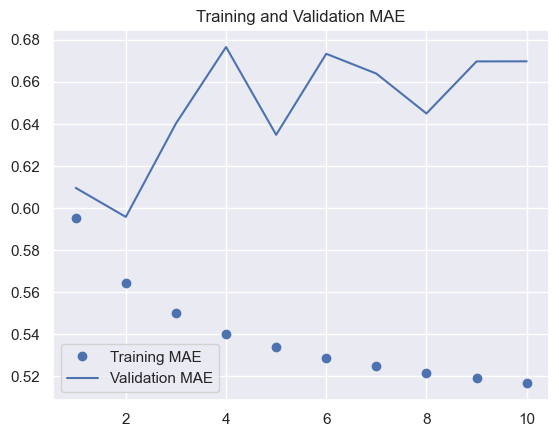

In [25]:
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs) #16 hidden units
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_bidirectional_lstm.tf", save_best_only=True) # .tf instead of .keras because of weird versioning issues
    #keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) #copilot wanted this, research why
]
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae') #copilot wanted this, research why
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_bidirectional_lstm.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

#and plot it
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [26]:
# #copilot suggested this, so I tried it for funsies, but it doesn't work ofc
# model = keras.models.Sequential([
#     keras.layers.LSTM(32, return_sequences=False, input_shape=(sequence_length, clean_data.shape[-1])),
#     keras.layers.Dense(1)
# ])
# 
# callbacks = [
#     keras.callbacks.ModelCheckpoint("pikapower_lstm_sequential.tf", save_best_only=True)
# ]
# 
# model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
# 
# history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)
# 
# model = keras.models.load_model("pikapower_lstm_sequential.tf")
# print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
# 
# #and plot it
# loss = history.history['mae']
# val_loss = history.history['val_mae']
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training MAE')
# plt.plot(epochs, val_loss, 'b', label='Validation MAE')
# plt.title('Training and Validation MAE')
# plt.legend()
# plt.show()

Welp... That's a brand new error "OSError: no file or directory found at pikapower_lstm_sequential.tf", which of course it only decided to grace me with after running the entire training block for 2 hours...

In [27]:
# !pip install --upgrade torch
# #!pip install scikit-learn

In [28]:
#I wanna play with PyTorch too and try some stuff but it's super not working atm so I'm going to comment it out and see if I can get it to work later
# import torch
# import torch.nn as nn
# import torch.optim as optim
# 
# from sklearn.preprocessing import MinMaxScaler
# 
# # Define and fit the scaler
# scaler = MinMaxScaler()
# scaler.fit(clean_data)
# 
# #convert training data to tensor
# train_data_t = torch.tensor(clean_data[:num_train_samples], dtype=torch.float32)
# 
# #model definition
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_layer_size, output_size):
#         super().__init__()
#         self.hidden_layer_size = hidden_layer_size
#         self.lstm = nn.LSTM(input_size, hidden_layer_size) #add LSTM layer
#         self.linear = nn.Linear(hidden_layer_size, output_size) #add fully connected layer
#         self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
#                             torch.zeros(1,1,self.hidden_layer_size))
#         
#     def forward(self, input_seq):
#         lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
#         predictions = self.linear(lstm_out.view(len(input_seq), -1))
#         return predictions[-1]
#   
# #instantiating the model
# model = LSTM(input_size=clean_data.shape[-1], hidden_layer_size=32, output_size=1)
# #loss
# loss_function = nn.MSELoss()
# #optimizer 
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# 
# print(model)
# 
# 
# #training
# epochs = 10
# 
# for epoch in range(epochs):
#     for samples, targets in train_dataset:
#         optimizer.zero_grad()
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
#                         torch.zeros(1, 1, model.hidden_layer_size))
# 
#         y_pred = model(samples)
#         single_loss = loss_function(y_pred, targets)
#         single_loss.backward()
#         optimizer.step()
# 
#         print(f'epoch: {epoch+1:2} loss: {single_loss.item():10.8f}')
# 
# 
# #test set predictions
# future = 12
# 
# predictions = train_data_t[-sequence_length:].tolist()
# 
# model.eval()
# 
# for i in range(future):
#     seq = torch.FloatTensor(predictions[-sequence_length:])
#     with torch.no_grad():
#         model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
#                         torch.zeros(1, 1, model.hidden_layer_size))
#         predictions.append(model(seq).item())
# print(predictions[sequence_length:])
# print(df['Global_active_power'][-12:])#actual values
# 
# true_predictions = scaler.inverse_transform(np.array(predictions[sequence_length:]).reshape(-1, 1))
# print(true_predictions)